In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
violencia =pd.read_csv("./violencia_clean.csv")
violencia.head()

,orden,departamento,municipio,semana,año,grupo edad,ciclo de vida,sexo_,area_,barrio,...,sust_vict,fec_hecho,hora_hecho,escenario,zona_conf,nom_eve,nom_upgd,ndep_resi,nmun_resi,mes
0,1,santander,bucaramanga,23,2015-01-01,12 a 17,adolescencia,masculino,CABECERA MUNICIPAL,transición,...,2,2015-06-12,06:30,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,SERVICLINICOS DROMEDICA SA,santander,BUCARAMANGA,6
1,2,santander,bucaramanga,5,2015-01-01,12 a 17,adolescencia,masculino,CABECERA MUNICIPAL,betania,...,2,2015-02-04,10:00,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,santander,BUCARAMANGA,2
2,3,santander,bucaramanga,29,2015-01-01,12 a 17,adolescencia,femenino,CABECERA MUNICIPAL,el mirador,...,2,2015-07-21,08:00,2.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL UNIVERSITARIO DE SANTANDER,santander,BUCARAMANGA,7
3,4,santander,bucaramanga,16,2015-01-01,12 a 17,adolescencia,femenino,CABECERA MUNICIPAL,maría paz,...,2,2015-04-22,13:30,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,santander,BUCARAMANGA,4
4,5,santander,bucaramanga,44,2015-01-01,12 a 17,adolescencia,femenino,CABECERA MUNICIPAL,colorados,...,2,2015-11-01,20:00,7.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,santander,BUCARAMANGA,11


In [3]:
violencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   orden                     10242 non-null  int64  
 1   departamento              10242 non-null  object 
 2   municipio                 10242 non-null  object 
 3   semana                    10242 non-null  int64  
 4   año                       10242 non-null  object 
 5   grupo edad                10241 non-null  object 
 6   ciclo de vida             10241 non-null  object 
 7   sexo_                     10242 non-null  object 
 8   area_                     10242 non-null  object 
 9   barrio                    10242 non-null  object 
 10  comuna                    10153 non-null  object 
 11  tipo de seguridad social  10242 non-null  object 
 12  pac_hos_                  10242 non-null  int64  
 13  con_fin_                  10238 non-null  float64
 14  versio

In [4]:
violencia_ocurrences= violencia.groupby('municipio').count().reset_index().sort_values('naturaleza',ascending=False)

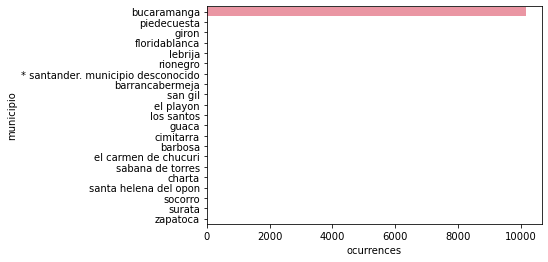

In [5]:
sns.barplot(y='municipio',x='naturaleza',data = violencia_ocurrences, orient = 'h').set(xlabel='ocurrences');

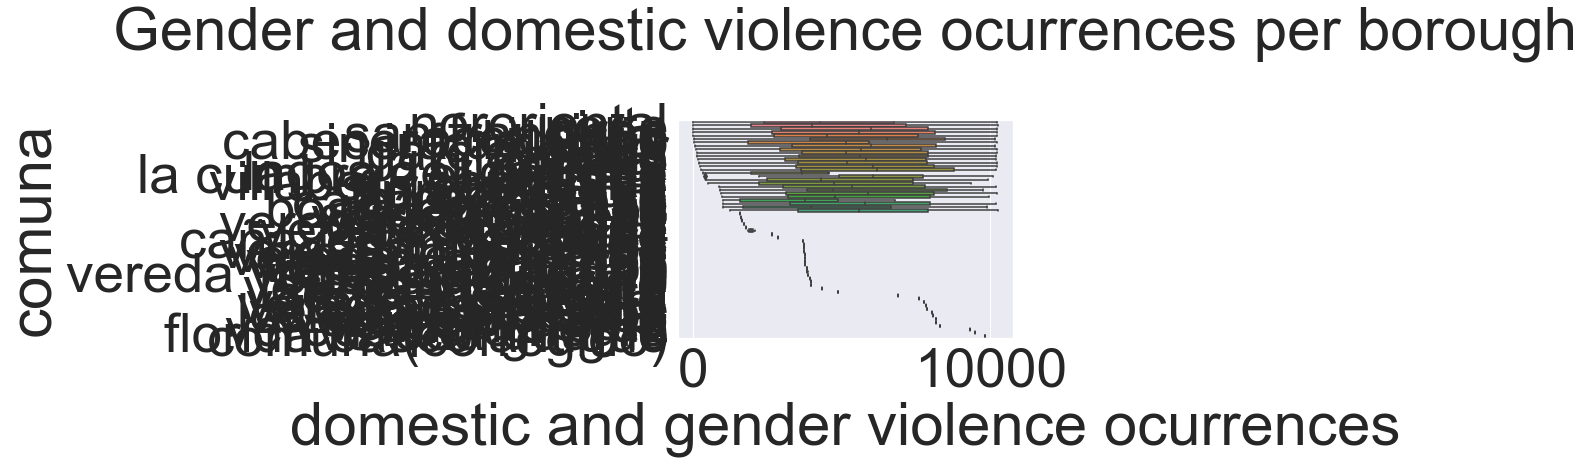

In [6]:
violencia_ocurrences_bucaramanga = violencia[violencia['municipio'] == 'bucaramanga']
#violencia_ocurrences_bucaramanga =violencia.groupby('orden').count().reset_index().sort_values('naturaleza',ascending=False).head(10)
sns.set(font_scale = 5)
sns.boxplot(y='comuna',x='orden',data = violencia_ocurrences_bucaramanga,orient='h',palette='husl').set(xlabel='domestic and gender violence ocurrences',title='Gender and domestic violence ocurrences per borough\n');



<AxesSubplot:xlabel='año', ylabel='naturaleza'>

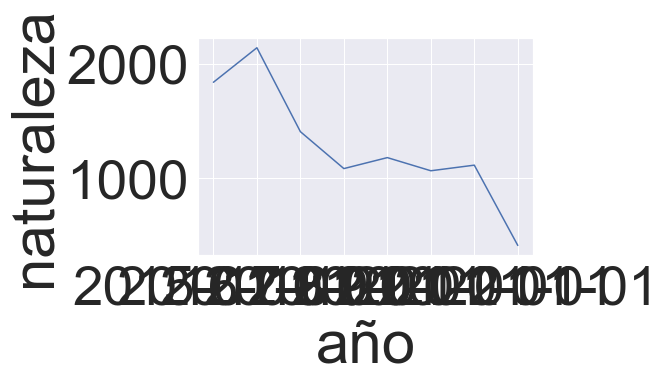

In [7]:
violencia_año= violencia.groupby('año').count().reset_index()
violencia_año
sns.lineplot(x='año',y= 'naturaleza',data = violencia_año)

In [8]:
violencia.columns

Index(['orden', 'departamento', 'municipio', 'semana', 'año', 'grupo edad',
       'ciclo de vida', 'sexo_', 'area_', 'barrio', 'comuna',
       'tipo de seguridad social', 'pac_hos_', 'con_fin_', 'version',
       'naturaleza', 'def_naturaleza', 'actividad', 'nom_actividad',
       'edad_agre', 'sexo_agre', 'parentezco_vict', 'sust_vict', 'fec_hecho',
       'hora_hecho', 'escenario', 'zona_conf', 'nom_eve', 'nom_upgd',
       'ndep_resi', 'nmun_resi', 'mes'],
      dtype='object')

[Text(0.5, 0, 'ocurrences')]

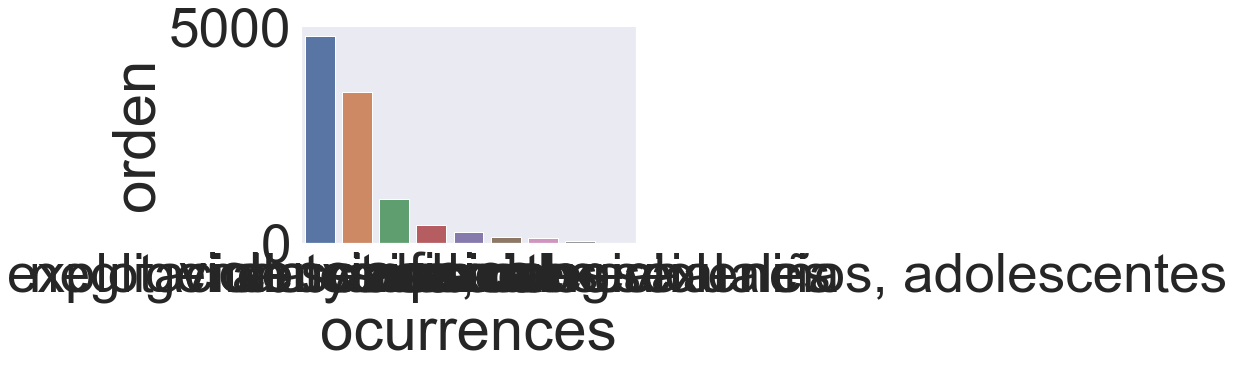

In [9]:
violencia_nat= violencia.groupby('def_naturaleza').count().reset_index().sort_values('orden',ascending=False)
sns.barplot(x='def_naturaleza',y='orden',data = violencia_nat).set(xlabel='ocurrences')


In [10]:
violencia.columns

Index(['orden', 'departamento', 'municipio', 'semana', 'año', 'grupo edad',
       'ciclo de vida', 'sexo_', 'area_', 'barrio', 'comuna',
       'tipo de seguridad social', 'pac_hos_', 'con_fin_', 'version',
       'naturaleza', 'def_naturaleza', 'actividad', 'nom_actividad',
       'edad_agre', 'sexo_agre', 'parentezco_vict', 'sust_vict', 'fec_hecho',
       'hora_hecho', 'escenario', 'zona_conf', 'nom_eve', 'nom_upgd',
       'ndep_resi', 'nmun_resi', 'mes'],
      dtype='object')

In [11]:
pd.crosstab(index=violencia['comuna'], columns=violencia['def_naturaleza'], margins=True).sort_values('negligencia y abandono',ascending=False)

def_naturaleza,abuso sexual,acoso sexual,actos sexuales violencia,"explotacion sexual, comercial niños, adolescentes",negligencia y abandono,otros actos sexuales,violacion,violencia fisica,violencia psicologica,All
comuna,,,,,,,,,,
All,1007,139,120,3,4742,45,238,3455,404,10153
norte,149,21,23,0,901,4,34,506,47,1685
san francisco,82,6,11,0,446,1,28,288,28,890
sin informacion,94,7,8,0,401,5,5,271,25,816
occidental,76,7,9,0,378,2,9,288,25,794
...,...,...,...,...,...,...,...,...,...,...
vereda el tabacal,0,0,0,0,0,0,0,1,0,1
vereda el rosario,0,0,0,0,0,0,1,0,0,1
vereda el hortigal,1,0,0,0,0,0,0,0,0,1


In [12]:
#datset Información de medidas correctivas enero 2017 a febrero 2022
correc = pd.read_csv("./93._Informaci_n_de_medidas_correctivas_enero_2017_a_febrero_2022.csv")

In [13]:
correc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197460 entries, 0 to 197459
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DTO                         197460 non-null  object
 1   LUGAR                       197460 non-null  object
 2   UNIDAD_LABORA_POL           197460 non-null  object
 3   FECHA_HECHOS                197460 non-null  object
 4   HORA_HECHOS                 197460 non-null  object
 5   DIA_HECHOS                  197460 non-null  object
 6   FECHA_CREACION              197460 non-null  object
 7   LOCALIDAD                   197460 non-null  object
 8   BARRIO_HECHOS               197460 non-null  object
 9   SITIO                       197460 non-null  object
 10  ARTICULO                    197460 non-null  object
 11  COMPORTAMIENTO              197460 non-null  object
 12  APLICA_MEDIDA               197460 non-null  object
 13  MEDIDA                      1

In [14]:
#the columns with missing values
correc.isna().sum()[correc.isna().sum() > 0]

NACIONALIDAD            249
DESCRIPCIÓN_CAPÍTULO     64
dtype: int64

The missing values do not affect us much. seciall considering the big amount of data we have. So far, the columns that could be of use for us are the ones that provide location and time:

Location:
- DTO
- LUGAR
- LOCALIDAD
- BARRIO_HECHOS
Time:
- FECHA_HECHOS
- HORA_HECHOS
- DIA HECHOS
- AÑO_NUM
- MES_NUM
- DIA_NUM

Additionally, the columns that give information on the type of crime commited:

- ARTICULO
- COMPORTAMIENTO
- NÚMERO_COMPORTAMIENTO

Finally, some information in the offender could be of use too:

- EDAD
- NACIONALIDAD
- EXPDIENTE
- CURSO_VIDA
- CURSO VIDA ORDEN

Note that some of the columns are redundant. BU we will leave them like such for now.

In [15]:
#making the respective columns into datetime type
#all these columns are dates and times, and some are redundant, but they can be useful for seeing 
#data trends by day, hour, etc

correc["FECHA_HECHOS"]= pd.to_datetime(correc["FECHA_HECHOS"],  format='%d/%m/%Y')
correc["HORA_HECHOS"]= pd.to_datetime(correc["HORA_HECHOS"], format='%H:%M:%S').dt.time
correc["AÑO_NUM"]= pd.to_datetime(correc["AÑO_NUM"], format = '%Y')
correc["MES_NUM"]= pd.to_datetime(correc["MES_NUM"], format = '%m')
correc["DIA_NUM"]= pd.to_datetime(correc["DIA_NUM"], format = '%d')
correc["RANGO_HORARIO_ORDEN"]= pd.to_datetime(correc["RANGO_HORARIO_ORDEN"], format = '%H')

correc["FECHA_CREACION"] = correc["FECHA_CREACION"].replace({'a. m.': 'AM', 'p. m.': 'PM'}, regex=True)
correc["FECHA_CREACION"]= pd.to_datetime(correc["FECHA_CREACION"], format='%d/%m/%Y %I:%M:%S %p')

In [16]:
correc[["EDAD","CURSO VIDA ORDEN","RANGO_HORARIO_ORDEN"]].describe()

,EDAD,CURSO VIDA ORDEN
count,197460.000000,197460.000000
mean,28.346430,5.264560
std,9.671231,1.966445
min,0.000000,0.000000
25%,21.000000,4.000000
50%,25.000000,5.000000
75%,32.000000,6.000000
max,91.000000,17.000000


In [17]:
def plot_time( df, time_var, title, rot = 0):
    
    res = df.groupby([time_var])['ID'].count().reset_index(name="count")
    p = res.plot(x = time_var, y = "count", title = title, rot = rot, figsize=(20,8))
    return p

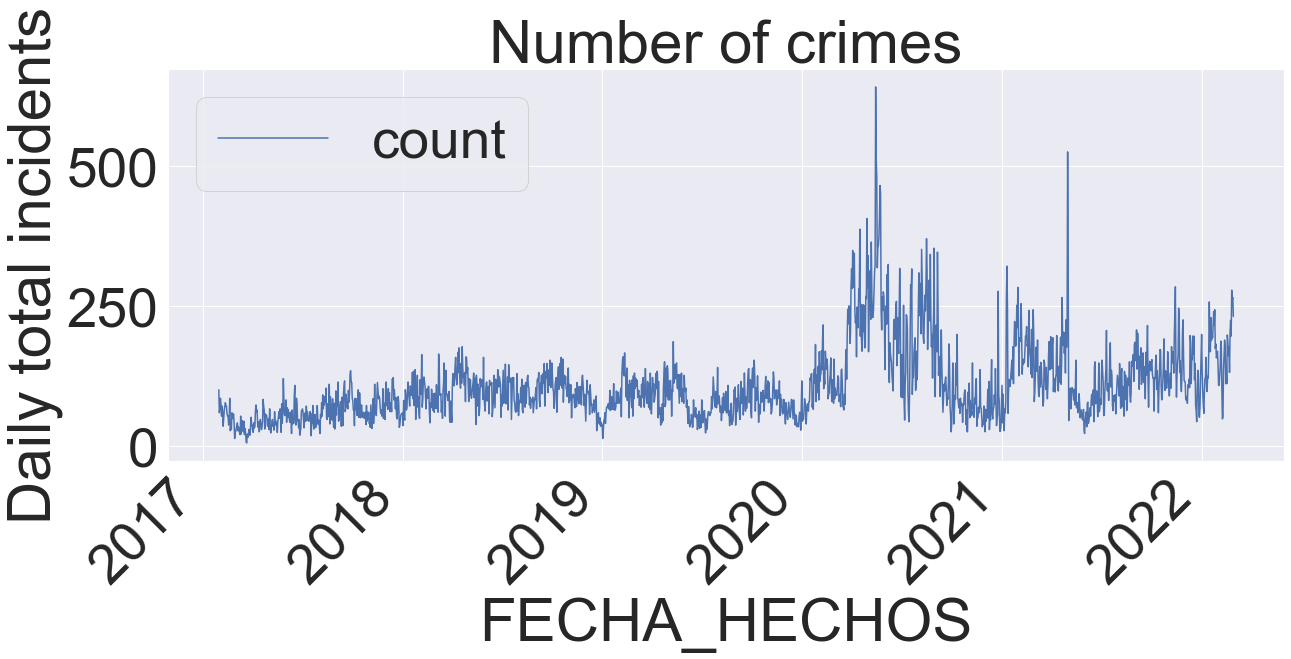

In [18]:
p_daily = plot_time( correc, "FECHA_HECHOS", "Number of crimes", rot = 45)
_ = plt.ylabel("Daily total incidents")

In the previous plot of amount of daily crimes across the years, we can see that the amount of crimes inceased in 2020, presumably because of the pandemic.

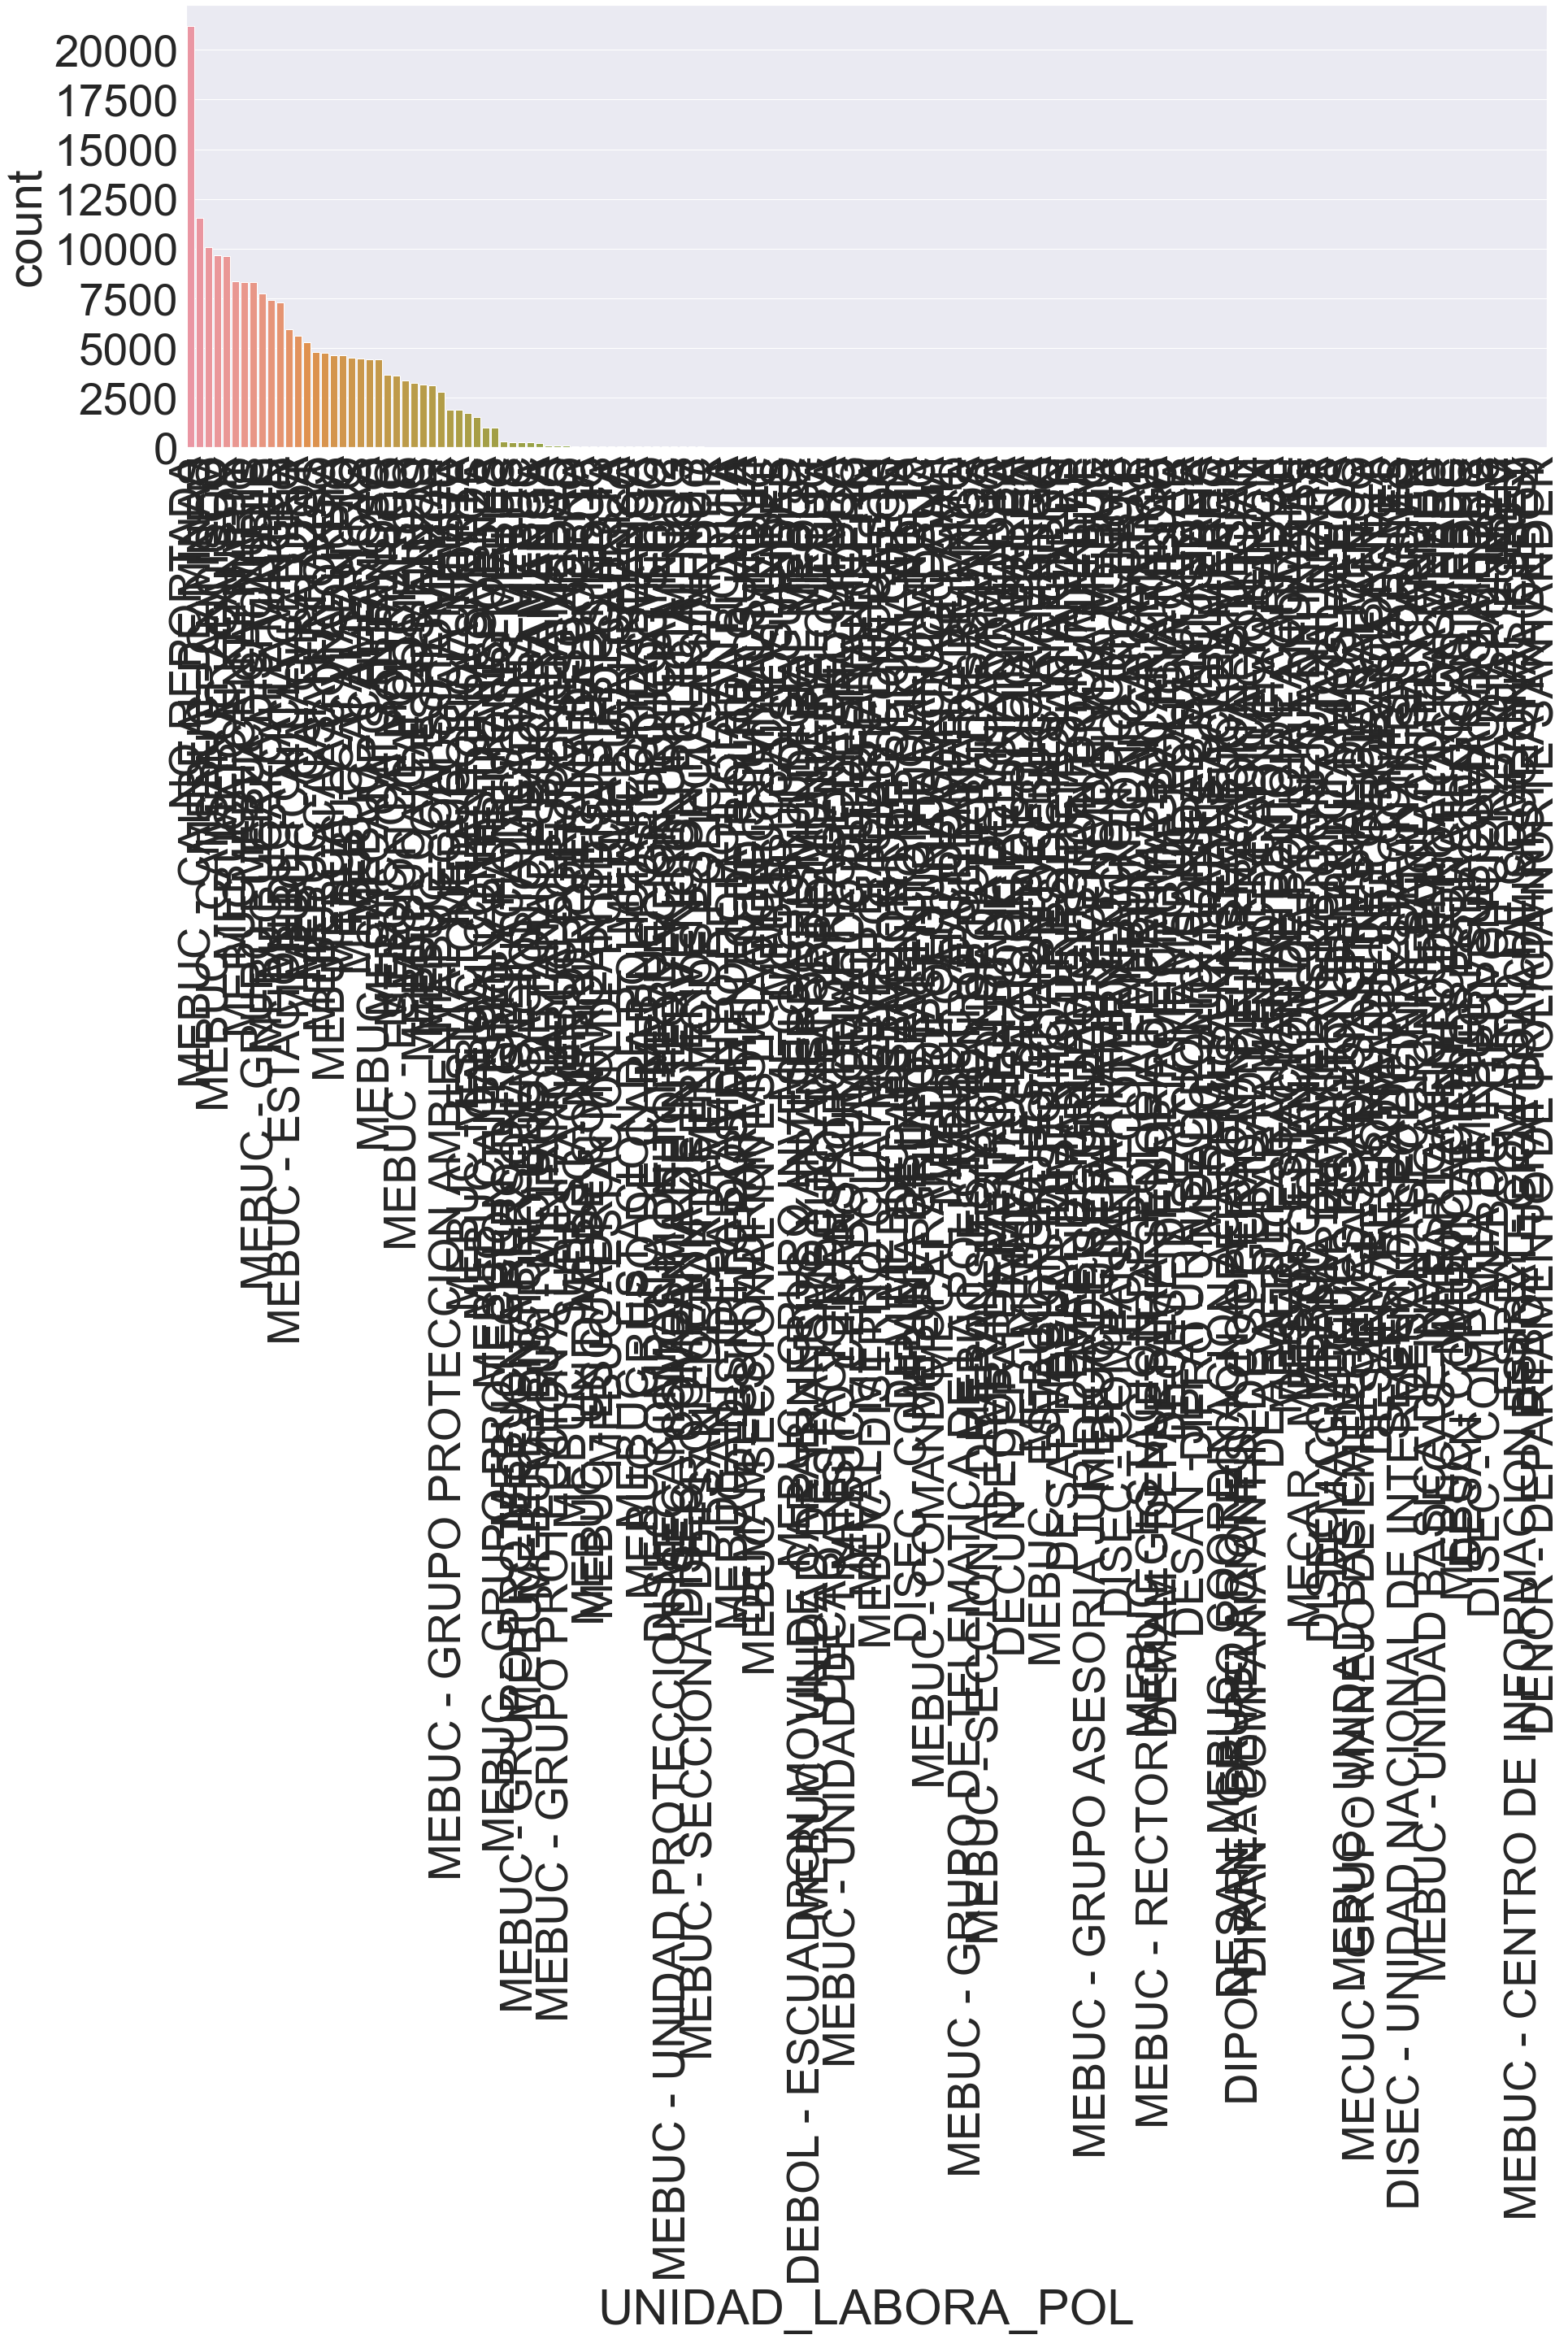

In [19]:
fig_dims = (30, 10)

fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.countplot(x="UNIDAD_LABORA_POL", data=correc, order = correc['UNIDAD_LABORA_POL'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

sns.set(font_scale = 1)

In the previous bar plot, we can see that there are certain loactions where a way greater amount of the corrective measurements were imposed.

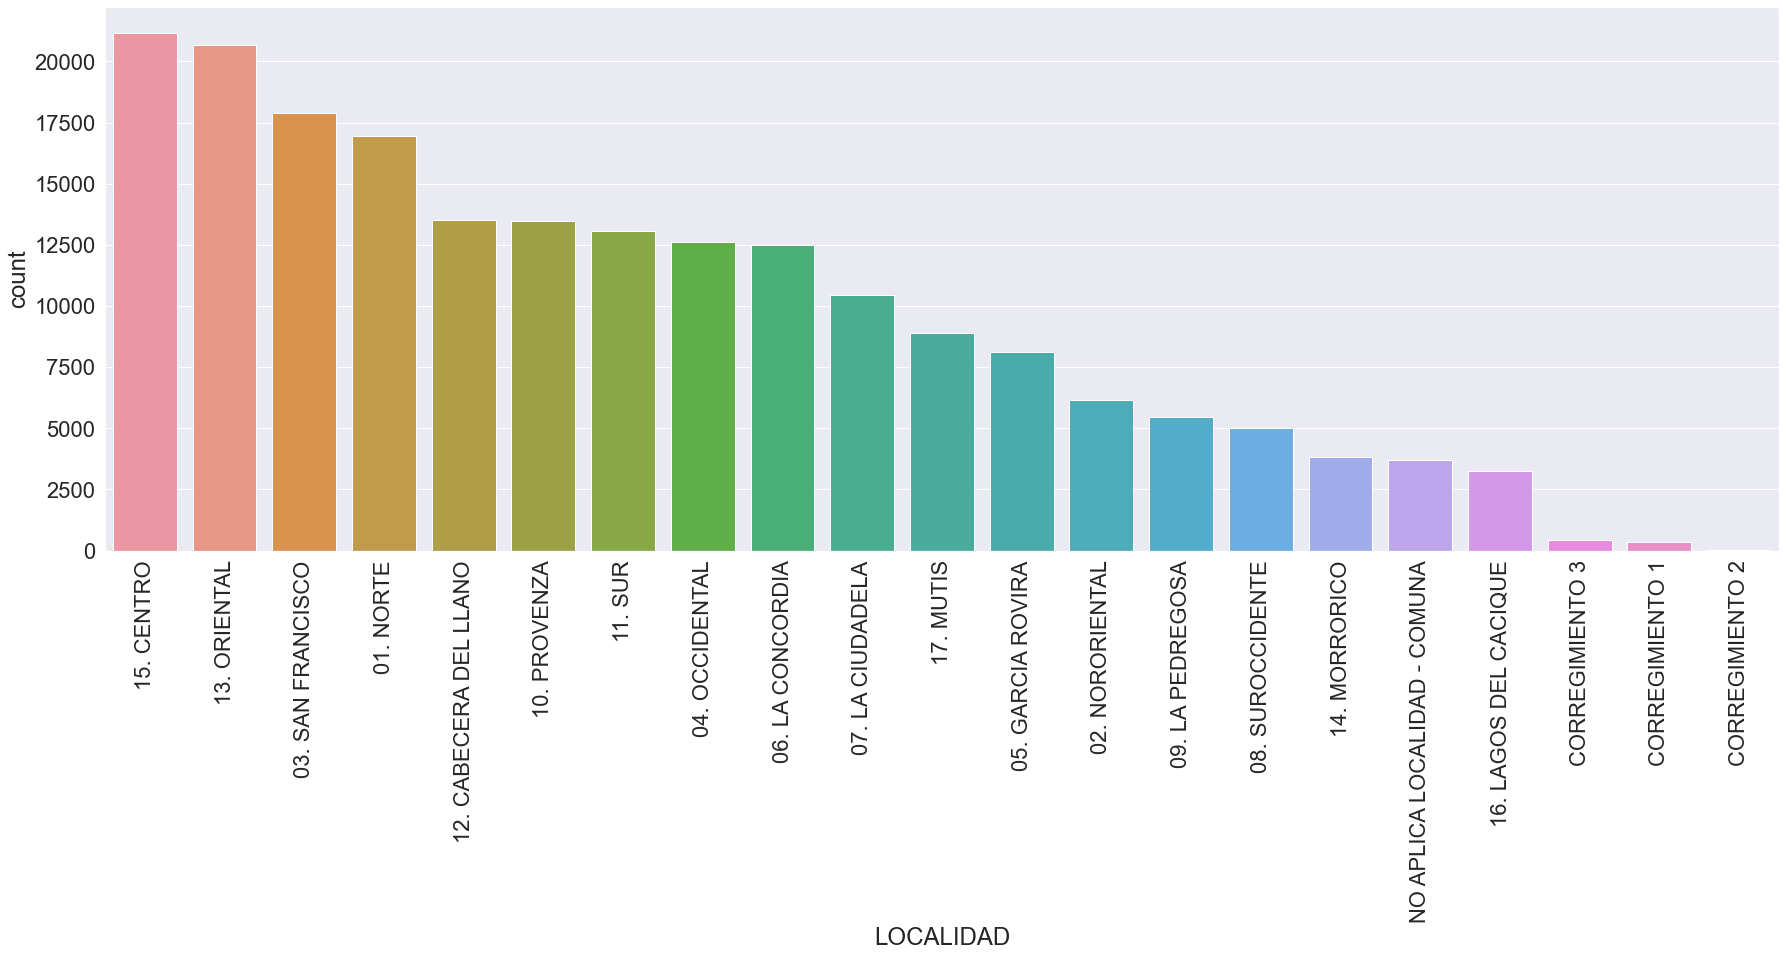

In [20]:
sns.set(font_scale = 2)

fig_dims = (30, 10)

fig, ax1 = plt.subplots(figsize=fig_dims)

ax1 = sns.countplot(x="LOCALIDAD", data=correc, order = correc['LOCALIDAD'].value_counts().index)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);


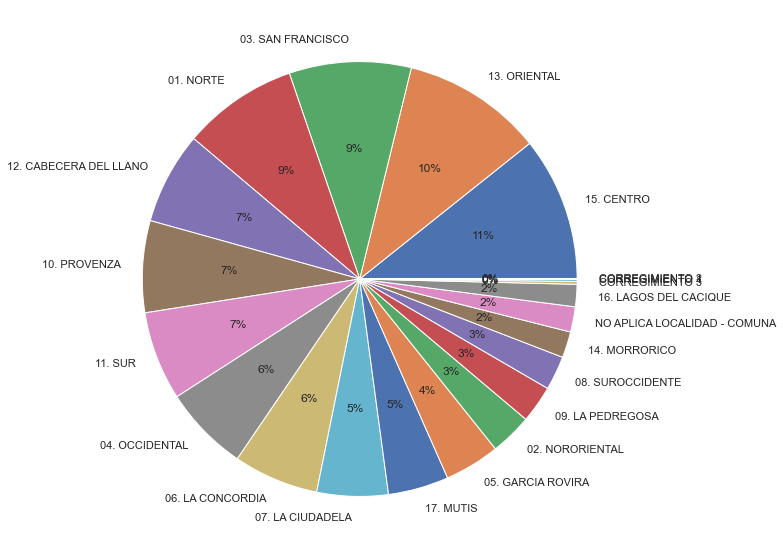

In [21]:
sns.set(font_scale = 1)
fig_dims = (10, 10)
fig = plt.subplots(figsize=fig_dims)
plt.pie(correc['LOCALIDAD'].value_counts(), labels = correc['LOCALIDAD'].value_counts().index, autopct='%.0f%%')
plt.show()

In the previous plots we can see that the majority of crimes are distributed among several neighborhoods, which we can organise in a descending manner and see the ones wih the most and least crime.

In [22]:
pd.crosstab(index=correc['LOCALIDAD'], columns=correc['NÚMERO_COMPORTAMIENTO'], margins=True)

NÚMERO_COMPORTAMIENTO,0,Art. 196,Art. 27,Art. 92,Lit. a,Lit. b,Lit. c,Lit. d,Lit. e,Lit. f,...,Num. 2,Num. 20,Num. 3,Num. 4,Num. 5,Num. 6,Num. 7,Num. 8,Num. 9,All
LOCALIDAD,,,,,,,,,,,,,,,,,,,,,
01. NORTE,0,0,1,0,62,36,39,0,39,3,...,3879,0,449,377,137,7941,1948,269,8,16941
02. NORORIENTAL,0,0,0,0,12,4,20,0,0,0,...,1772,0,178,93,51,2654,538,249,0,6137
03. SAN FRANCISCO,0,0,1,0,36,11,66,3,30,0,...,4542,0,442,384,179,6562,2491,1153,9,17899
04. OCCIDENTAL,1,0,0,0,33,8,31,2,24,0,...,3603,0,376,339,80,4791,1323,503,21,12602
05. GARCIA ROVIRA,0,0,1,0,14,4,40,0,6,0,...,1993,0,138,198,18,3618,874,352,6,8112
06. LA CONCORDIA,0,0,0,0,13,7,30,14,9,3,...,3134,0,228,278,57,4079,2025,1165,19,12511
07. LA CIUDADELA,0,0,1,0,15,10,10,0,0,0,...,1955,0,186,300,45,2508,2767,1868,6,10455
08. SUROCCIDENTE,0,0,0,0,0,3,2,1,0,0,...,1315,0,134,101,16,2029,441,414,12,4997
09. LA PEDREGOSA,0,0,0,1,12,0,20,0,3,0,...,1319,0,86,78,40,1787,1193,412,27,5469


In [23]:
#the comportamientos are furter explained in the column DESCRIPCIÓN_COMPORTAMIENTO, but the explanations are
#extensive, so I prefer to use this column, which has sorter names fot them. We have a total of 29 comportamientos

correc['NÚMERO_COMPORTAMIENTO'].value_counts()

Num. 6      72019
Num. 2      46253
Num. 7      30120
Num. 8      16022
Num. 1      12620
Num. 4       5323
Num. 3       4171
Num. 16      3299
Num. 13      2600
Num. 11      1589
Num. 5       1125
Lit. c        433
Num. 10       373
Lit. a        352
Num. 12       252
Lit. e        224
Num. 9        216
Lit. b        192
Num. 14       153
Lit. d         48
Num. 15        37
Lit. h         19
Lit. f         10
Art. 27         5
Art. 92         1
0               1
Num. 20         1
Num. 19         1
Art. 196        1
Name: NÚMERO_COMPORTAMIENTO, dtype: int64